In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ID = test['Id']

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
y = train['SalePrice']

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

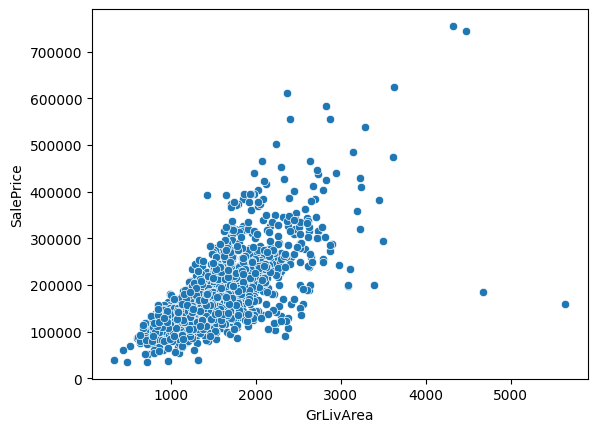

In [5]:
sns.scatterplot(train,x = 'GrLivArea',y = 'SalePrice')

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

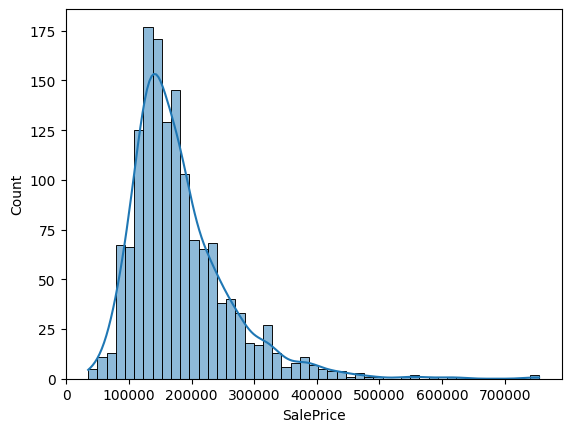

In [6]:
sns.histplot(train,x = "SalePrice",kde = True)

In [7]:
train[train['GrLivArea'] >4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [8]:
train.drop(index = [523,1298],inplace = True)

In [9]:
train["SalePrice"] = np.log1p(train["SalePrice"])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

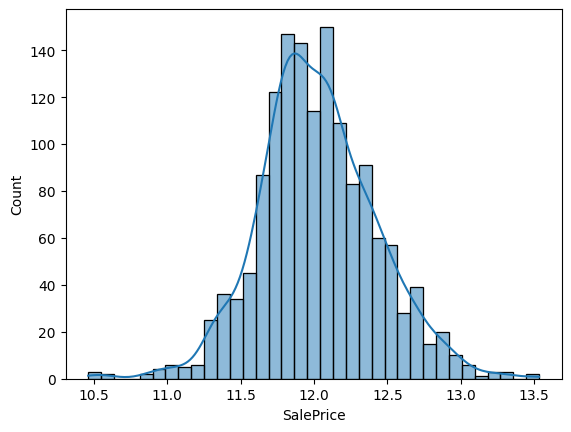

In [10]:
sns.histplot(train,x = "SalePrice",kde = True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_28268\3680059826.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()


EnclosedPorch   -0.149029
KitchenAbvGr    -0.147534
MSSubClass      -0.073969
LowQualFinSF    -0.037951
YrSold          -0.037151
OverallCond     -0.036821
MiscVal         -0.020012
Id              -0.017774
BsmtHalfBath    -0.005124
BsmtFinSF2       0.004863
3SsnPorch        0.054914
MoSold           0.057064
PoolArea         0.074338
ScreenPorch      0.121245
BedroomAbvGr     0.209035
BsmtUnfSF        0.221892
BsmtFullBath     0.237099
LotArea          0.260544
HalfBath         0.314186
2ndFlrSF         0.319953
OpenPorchSF      0.325215
WoodDeckSF       0.334251
LotFrontage      0.372900
BsmtFinSF1       0.392283
MasVnrArea       0.434621
Fireplaces       0.491998
TotRmsAbvGrd     0.537702
GarageYrBlt      0.541638
YearRemodAdd     0.565992
YearBuilt        0.587043
FullBath         0.595899
1stFlrSF         0.620500
TotalBsmtSF      0.647563
GarageArea       0.656129
GarageCars       0.681033
GrLivArea        0.725211
OverallQual      0.821405
SalePrice        1.000000
Name: SalePr

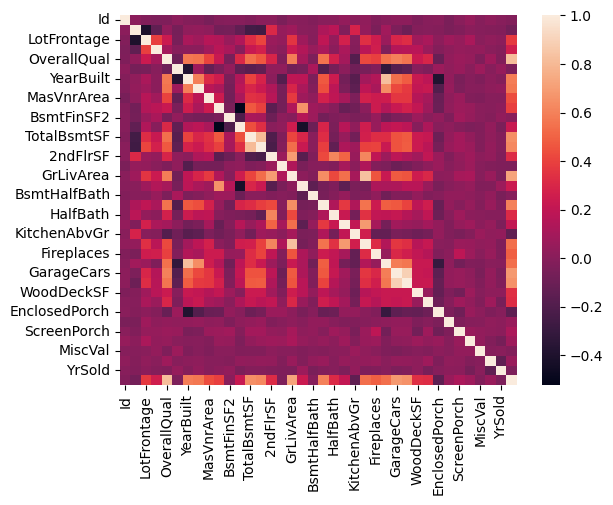

In [11]:
train_corr = train.corr()
sns.heatmap(train_corr)
train_corr['SalePrice'].sort_values()

In [12]:
y = train['SalePrice']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'],inplace = True,axis = 1)
ntrain = train.shape[0]
ntest = test.shape[0]

<AxesSubplot: >

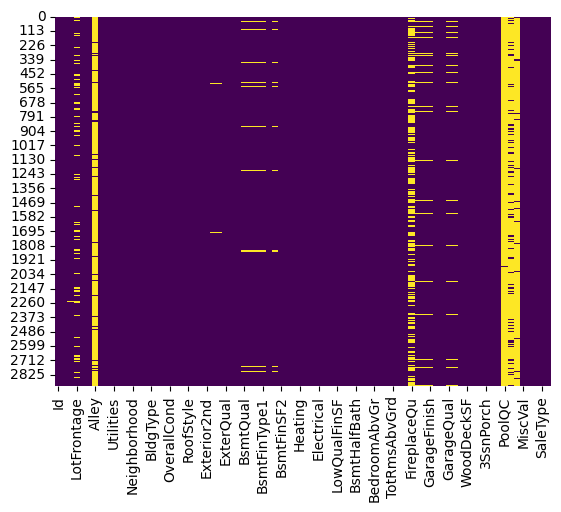

In [13]:
sns.heatmap(all_data.isnull(),cmap = 'viridis',cbar = False)

In [14]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
     all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")    

In [15]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [16]:
all_data.drop('Id',axis = 1,inplace = True)

In [17]:
all_numfeatures = all_data.select_dtypes(exclude = ["object"]).columns
all_catfeatures = all_data.select_dtypes(include = ["object"]).columns

In [18]:
all_num = all_data[all_numfeatures]
all_cat = all_data[all_catfeatures]

In [19]:
skewness = all_num.apply(lambda x: skew(x))

In [20]:
skew_df = pd.DataFrame(skewness,columns = ['Skewness'])

In [21]:
for cols in skew_df[skew_df['Skewness'] > 0.75].index:
    all_data[cols] = np.log1p(all_data[cols])

In [22]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,4.110874,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,2,2008,WD,Normal,7.850493
1,3.044522,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,...,0.0,None,None,None,0.000000,5,2007,WD,Normal,7.833996
2,4.110874,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,9,2008,WD,Normal,7.903596
3,4.262680,RL,4.110874,9.164401,Pave,None,IR1,Lvl,Corner,Gtl,...,0.0,None,None,None,0.000000,2,2006,WD,Abnorml,7.813592
4,4.110874,RL,4.442651,9.565284,Pave,None,IR1,Lvl,FR2,Gtl,...,0.0,None,None,None,0.000000,12,2008,WD,Normal,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,5.081404,RM,3.091042,7.568896,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,6,2006,WD,Normal,7.401842
2913,5.081404,RM,3.091042,7.546974,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,4,2006,WD,Abnorml,7.401842
2914,3.044522,RL,5.081404,9.903538,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,9,2006,WD,Abnorml,7.803435
2915,4.454347,RL,4.143135,9.253591,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,MnPrv,Shed,6.552508,7,2006,WD,Normal,7.540622


In [23]:
all_data = pd.get_dummies(all_data)

In [24]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [25]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [26]:
lasso = Lasso()
para_grid = {
    'alpha': [0.5,0.05,0.005,0.0005,0.00005] 
}
lasso_grid= GridSearchCV(lasso, param_grid = para_grid, cv = 3, verbose=True, n_jobs=-1)
best_lasso = lasso_grid.fit(train,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [27]:
best_lasso.best_params_

{'alpha': 0.0005}

In [28]:
lasso_model =make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [29]:
ridge = Ridge(alpha = 0.0005,random_state = 1)

In [30]:
xgb = XGBRegressor()
param_grid =  {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01,.03, 0.05, .07,0.09,0.1], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [0.1,0.5,1,3,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_xgb = xgb_grid.fit(train,y)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[14:28:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [31]:
best_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [32]:
xgb_model = XGBRegressor(colsample_bytree = 0.7,
 learning_rate= 0.03,
 max_depth= 5,
 min_child_weight= 4,
 n_estimators= 500,
 nthread= 4,
 objective = 'reg:linear',
 subsample = 0.7)

In [33]:
kf = 5
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [34]:
score = cross_val_score(lasso_model, train, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.01068232 -0.01226205 -0.01474169 -0.01037287 -0.01234847]
rmse= 0.11


In [35]:
score = cross_val_score(ridge, train, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.01410541 -0.01684923 -0.02249445 -0.01259254 -0.01450407]
rmse= 0.13


In [36]:
score = cross_val_score(xgb_model, train, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

[14:28:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [38]:
#FINAL TEST
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
lasso_model.fit(train,y)
lasso_train_pred = lasso_model.predict(train)
print(rmsle(y, lasso_train_pred))

0.09874969815948714


In [39]:
ridge.fit(train,y)
ridge_train_pred = ridge.predict(train)
print(rmsle(y, ridge_train_pred))

0.08934971101928905


In [40]:
xgb_model.fit(train,y)
xgb_train_pred = xgb_model.predict(train)
print(rmsle(y, xgb_train_pred))

[14:30:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.04863462180878877


In [41]:
final_pred = np.expm1(xgb_model.predict(test))

In [42]:
final_pred

array([124306.734, 162105.81 , 189368.6  , ..., 164872.64 , 117540.555,
       224179.03 ], dtype=float32)

In [43]:
sub = pd.DataFrame()

In [44]:
sub['ID'] = test_ID
sub['SalePrice'] = final_pred
sub.to_csv('final_sub.csv', index = False)